<a href="https://colab.research.google.com/github/RautenM/PythonFundamentals/blob/main/Copy_of_Copy_of_Air_quality_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

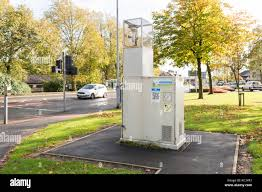



# Air quality 

The following data file contains data collected at a roadside monitoring station.  You can see the data in a spreadsheet here: https://docs.google.com/spreadsheets/d/1XpAvrpuyMsKDO76EZ3kxuddBOu7cZX1Od4uEts14zco/edit?usp=sharing




### Project 

The dataset can be viewed here:  https://drive.google.com/file/d/1aYmBf9il2dWA-EROvbYRCZ1rU2t7JwvJ/view?usp=sharing  and the data accessed here: https://drive.google.com/uc?id=1QSNJ3B1ku8kjXsA_tCBh4fbpDK7wVLAA This is a .csv file  



Nitrogen dioxide is part of a group of gaseous air pollutants produced as a result of road traffic and other fossil fuel combustion processes. It's presence in air contributes to the formation and modification of other air pollutants, such as ozone and particulate matter, and to acid rain.
In this project I will use NO2 to refer to Nitrogen dioxide.



In this project I am going to create visual graph to show the level of NO2 for each day of the week for year 2020.




After investigating and looking at my data I can conclude that in order to start coding first I need to prepare and clean my data. 
I need to skip a heading line, convert strings to float in Date column and because my data contain **no data** in **not recoginsed format** I have to use function to drop all those columns from NO2 levels to allow me to calculate the level of NO2 for each week day.


In [3]:
import pandas as pd

df = pd.read_csv("https://drive.google.com/uc?id=1QSNJ3B1ku8kjXsA_tCBh4fbpDK7wVLAA",skiprows = 1)
df.head()

,Date,Time,Nitrogen dioxide,Status
0,01/01/2020,1:00,35.65193,V µg/m³
1,01/01/2020,2:00,37.99122,V µg/m³
2,01/01/2020,3:00,35.70462,V µg/m³
3,01/01/2020,4:00,36.5796,V µg/m³
4,01/01/2020,5:00,32.9441,V µg/m³


In [4]:
df.describe()

,Date,Time,Nitrogen dioxide,Status
count,8784,8784,8784,8784
unique,366,24,8557,1
top,01/01/2020,1:00,nodata,V µg/m³
freq,24,366,112,8784


In [5]:
df=df.loc[df['Nitrogen dioxide']!="nodata"]
df

#drop the column

,Date,Time,Nitrogen dioxide,Status
0,01/01/2020,1:00,35.65193,V µg/m³
1,01/01/2020,2:00,37.99122,V µg/m³
2,01/01/2020,3:00,35.70462,V µg/m³
3,01/01/2020,4:00,36.5796,V µg/m³
4,01/01/2020,5:00,32.9441,V µg/m³
...,...,...,...,...
8779,31/12/2020,20:00,11.22419,V µg/m³
8780,31/12/2020,21:00,11.17037,V µg/m³
8781,31/12/2020,22:00,9.54137,V µg/m³
8782,31/12/2020,23:00,8.21683,V µg/m³


As my Data is clean and ready to convert and wrangle I am going to take all the data from Date column and group into week days column.
This will allow me to get an average of N02 for each day of the week and present on graph which you can see bellow 


In [8]:

df['Date']= pd.to_datetime(df['Date'])
df["day"]= df["Date"].dt.strftime('%A')
df["day_number"]=df["Date"].dt.weekday
display(df)
df['Nitrogen dioxide'] = df['Nitrogen dioxide'].astype(float)

week_df = df.groupby(df['day'])["Nitrogen dioxide"].mean()
print(week_df)


,Date,Time,Nitrogen dioxide,Status,day,day_number
0,2020-01-01,1:00,35.65193,V µg/m³,Wednesday,2
1,2020-01-01,2:00,37.99122,V µg/m³,Wednesday,2
2,2020-01-01,3:00,35.70462,V µg/m³,Wednesday,2
3,2020-01-01,4:00,36.57960,V µg/m³,Wednesday,2
4,2020-01-01,5:00,32.94410,V µg/m³,Wednesday,2
...,...,...,...,...,...,...
8779,2020-12-31,20:00,11.22419,V µg/m³,Thursday,3
8780,2020-12-31,21:00,11.17037,V µg/m³,Thursday,3
8781,2020-12-31,22:00,9.54137,V µg/m³,Thursday,3
8782,2020-12-31,23:00,8.21683,V µg/m³,Thursday,3


day
Friday        9.708354
Monday       10.176989
Saturday      9.970593
Sunday        8.769550
Thursday     10.769362
Tuesday      10.717548
Wednesday    11.829363
Name: Nitrogen dioxide, dtype: float64


Text(0, 0.5, 'Level of Nitrogen dioxide')

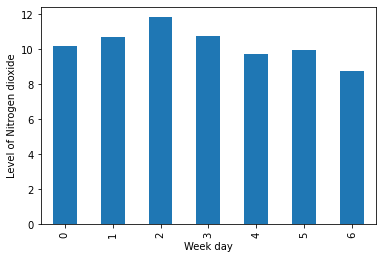

In [13]:
week_df = df.groupby(df['day_number'])["Nitrogen dioxide"].mean()
barchart = week_df.plot(x=df["day"].unique(), y=week_df, kind="bar")
#barchart.xticks(df["day"].unique())
barchart.set_xlabel("Week day")
barchart.set_ylabel("Level of Nitrogen dioxide")


Reflection

I really enjoyed this project because was short and simple but also I been working with Data and provided a result that should matter to people. 

Even though this project is simple I come across two challenges and also learnt a valuable lesson that being that the code is as simple as the data is clean. Trying to code with dirty data is like trying to drive a car by switching on the engine and then realising the car has no wheels.